In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv
from scipy import integrate
from scipy.stats import norm
from scipy.special import erfinv, erf

In [3]:
def phi(x,S0,sigmas,r,t,T):
    v = (sigmas[0]**2-sigmas[1]**2)*t + sigmas[1]**2 *T
    m = np.log(S0)+(r*T- (1/2 *v))
    return norm.pdf(x,m,np.sqrt(v))

def f0(Q,T,t):
    lam0 = abs(Q[0][0])
    lam1 = abs(Q[1][1])
    d=1
    sec = lam0*iv(0,2*(lam0*lam1*t*(T-t))**(1/2)) + ((lam0*lam1*t)/(T-t))**(1/2)*iv(1,2*(lam0*lam1*t*(T-t))**(1/2))
    out = np.exp(-lam0*T)*d + (np.exp(-lam1*(T-t)-lam0*t)* sec)
    return out

def f1(Q,T,t):
    lam0 = abs(Q[0][0])
    lam1 = abs(Q[1][1])
    d=0
    sec = (lam1*iv(0,2*(lam0*lam1*t*(T-t))**(1/2)))+((lam0*lam1*(T-t))/(t))**(1/2)*iv(1,2*(lam0*lam1*t*(T-t))**(1/2))
    out = np.exp(-lam1*T)*d + np.exp(-lam1*(T-t)-lam0*t) * sec
    return out


def BSWS_CALL(S,K,T,r,sigmas,Q):
    val,_ = integrate.dblquad(lambda y,t: (y/(y+K)) * phi(np.log(y+K),S,sigmas,r,t,T)*f0(Q,T,t), 0, T, 0, np.inf)
    return val*np.exp(-r*T)

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 / 2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)


In [7]:
S=350
K=200
T=0.25
r=0.1
sigmas=[0.1,1]
Q = np.array([[-2, 2], [4, -4]])  


print('Black-Scholes:\t',BS_CALL(S, K, T, r, sigmas[0]))
print('BSWS:\t\t',BSWS_CALL(S,K,T,r,sigmas,Q))

Black-Scholes:	 154.93801759433347
BSWS:		 85.5674484547266


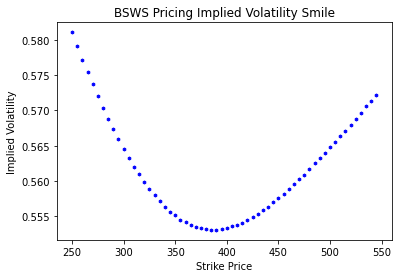

In [6]:
S = 350  
T = 1
r = 0.1

sigmas = [0.1, 1]  
Q = np.array([[-2, 2], [4, -4]])  


for k in range(250,550,5):
    price = BSWS_CALL(S, k, T, r, sigmas, Q)
    upper = 1
    lower = 0
    n=0
    while n<100:
        mid=(upper+lower)/2
        diff = price - BS_CALL(S, k , T, r, mid)
        if abs(diff) < 0.01:
            break
        elif diff>0:
            lower = mid
        elif diff<0:
            upper = mid
        n+=1
    

    plt.plot(k,mid,marker='h',markersize=3,color='blue')


plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('BSWS Pricing Implied Volatility Smile')
plt.savefig("Images/PricingIVBSWS.png", dpi=300)
plt.show()
